In [2]:
import sys
sys.path.append('../src')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal   
from scipy.signal import firwin, freqz, lfilter
from utils import plot_filter_characteristics

# Demonstration of the group delay correction for FIR filters

In [4]:
fs = 1024.0
numtaps = 2025  # N; group delay = (N-1)/2 = 1024 samples
delay = (numtaps - 1) // 2

# Bands (Hz): stop <1, pass 1–40, stop >40


# Design FIR (linear-phase, equiripple)
bh = firwin(numtaps, 1, fs=fs, pass_zero=False)

# Inspect frequency response (optional)
w, h = freqz(bh, worN=2048, fs=fs)

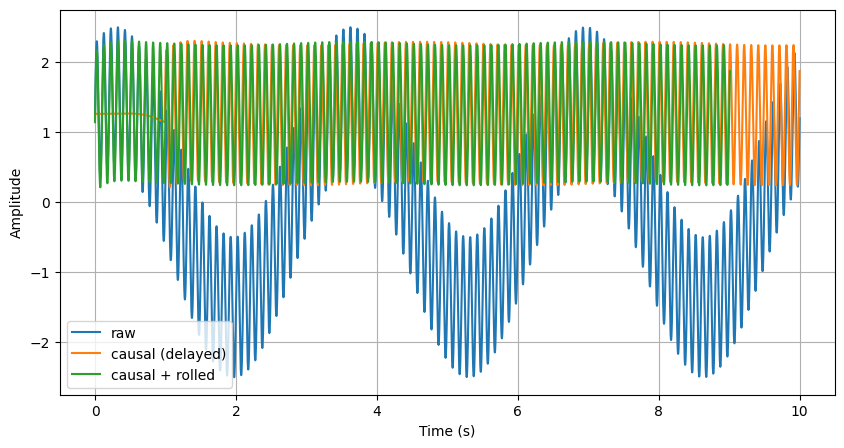

In [5]:
# Example signal x
t = np.arange(int(10*fs)) / fs
x = np.sin(2*np.pi*10*t) + 1.5*np.sin(2*np.pi*0.3*t+1) # 10 Hz + slow drift

# Causal filtering
first_x = x[0]
y = lfilter(bh, [1.0], x-first_x) + first_x

# Phase-delay correction by rolling
y_roll = np.roll(y, -delay)

# Handle the tail that got shifted left (set to NaN or zero, or trim)
y_roll[-delay:] = np.nan

# Plot
plt.figure(figsize=(10,5))
plt.plot(t, x, label='raw')
plt.plot(t, y, label='causal (delayed)')
plt.plot(t, y_roll, label='causal + rolled')
plt.legend(); plt.xlabel("Time (s)"); plt.ylabel("Amplitude"); plt.grid(True)
plt.show()

# Design and test of filters for EEG filtering in the SYNCC-IN UNIWAW data

---- Notch filter characteristics: --------


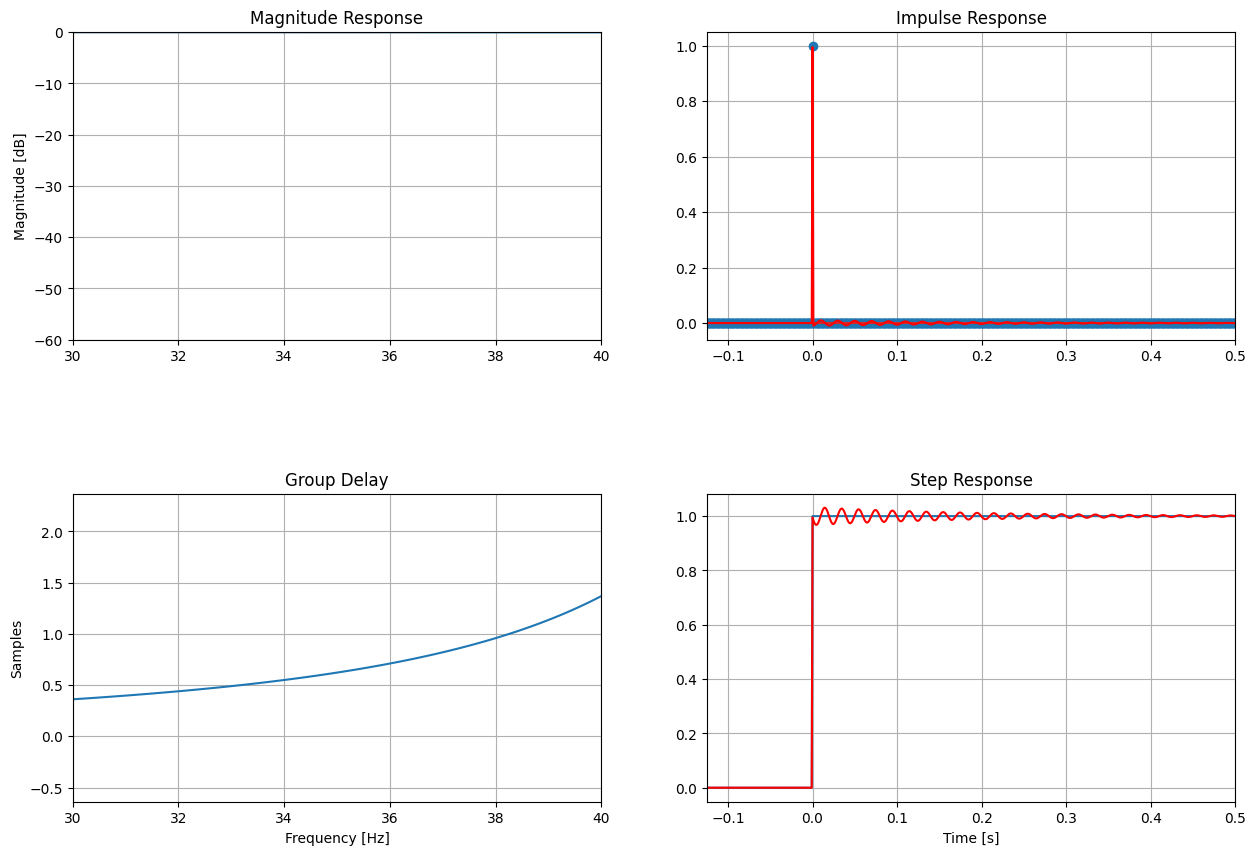

---- Low-pass filter characteristics: --------


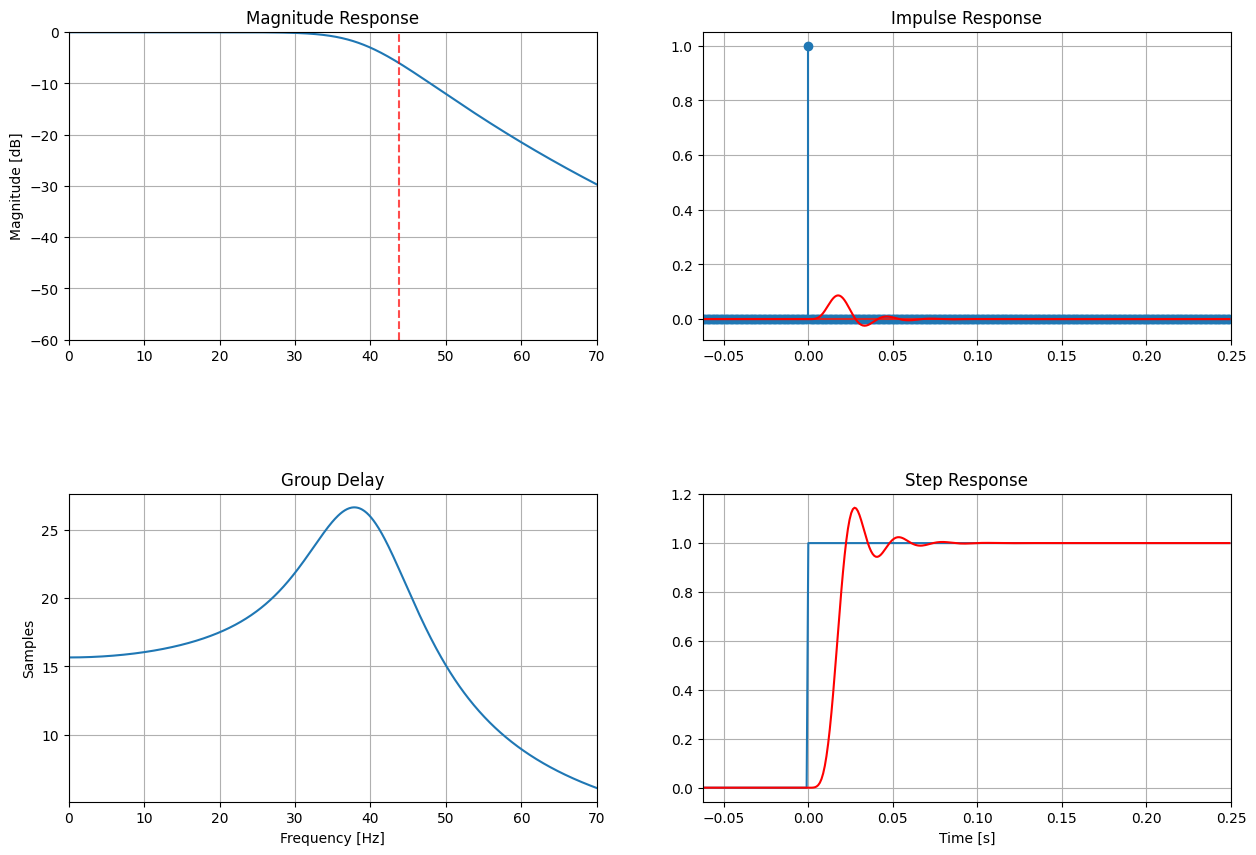

---- High-pass filter characteristics: --------


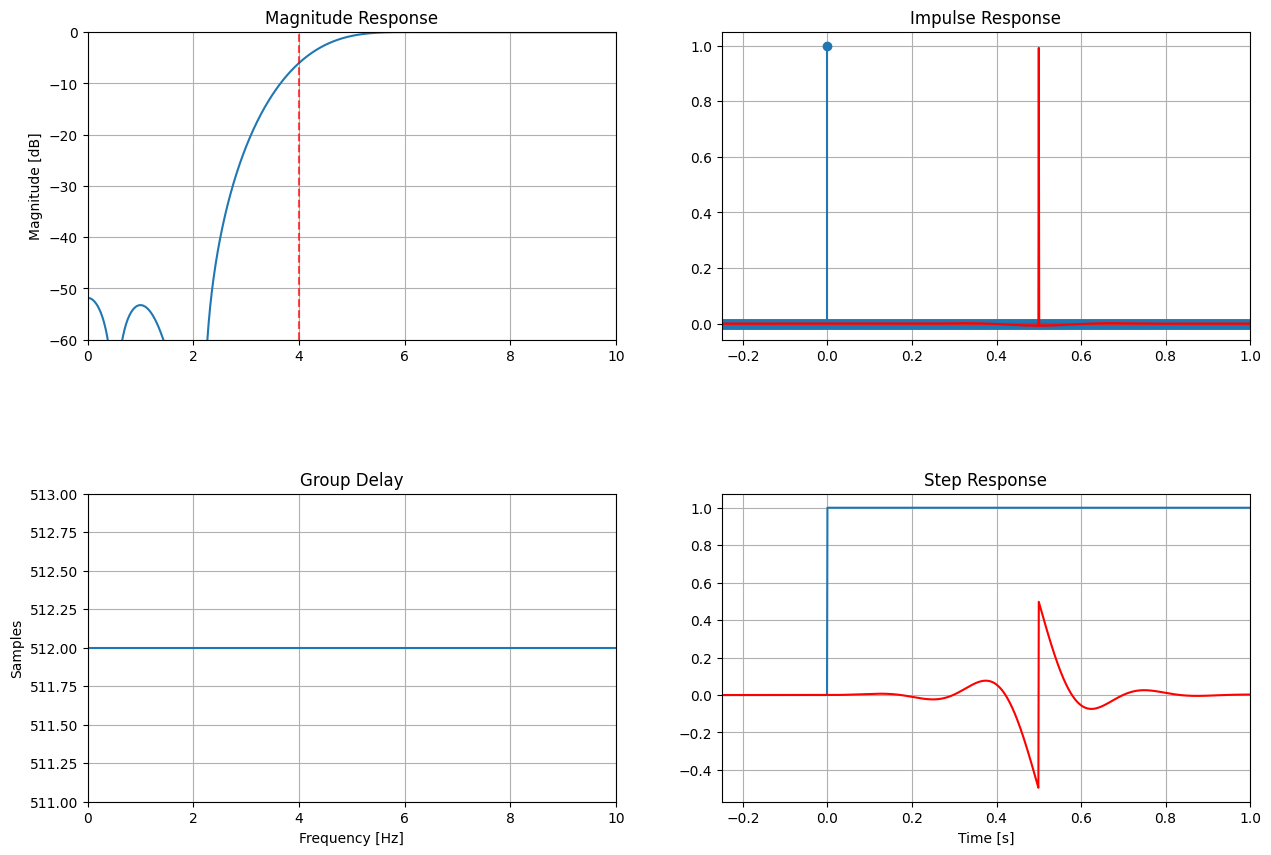

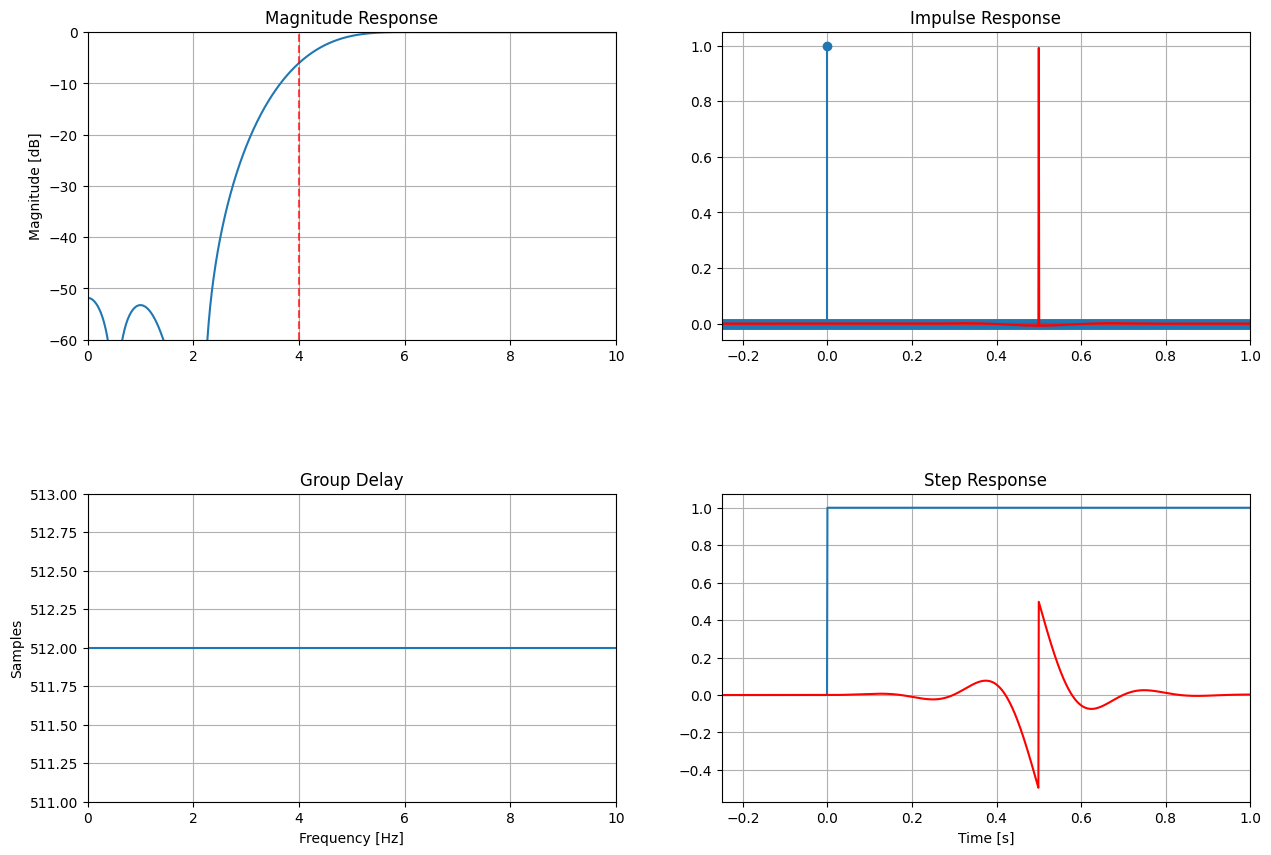

In [6]:
# Define filter parameters
notch_freq = 50  # Hz, e.g., for power line interference
highcut = 40     # Hz, low-pass cutoff
lowcut = 4       # Hz, high-pass cutoff
fs = 1024
print("---- Notch filter characteristics: --------")
#numtaps_notch = 2049  # Number of filter taps (order + 1)
#a_notch =[1]
#b_notch=firwin(numtaps_notch, [notch_freq - 1, notch_freq + 1], pass_zero='bandstop', fs=fs)
b_notch, a_notch = signal.iirnotch(notch_freq, Q=30, fs=fs)

plot_filter_characteristics(b_notch, a_notch, f=np.arange(0, fs/2, 0.1), T=0.5, Fs=fs, f_lim=(30, 40), db_lim=(-60, 0.1))
print("---- Low-pass filter characteristics: --------")
numtaps_low = 201  # Number of filter taps (order + 1)

#b_low = firwin(numtaps_low, highcut, pass_zero='lowpass', fs=fs)

b_low, a_low = signal.butter(N=6, Wn=highcut, btype='low', fs=fs)
plot_filter_characteristics(b_low, a_low, f=np.arange(0, fs/2, 0.1), T=0.25, Fs=fs, f_lim=(0, 70), db_lim=(-60, 0.1))
print("---- High-pass filter characteristics: --------")
numtaps_high = 1025  # Number of filter taps (order + 1)
b_high = firwin(numtaps_high, lowcut, pass_zero='highpass', fs=fs)
plot_filter_characteristics(b_high, a = [1] , f=np.arange(0, fs/2, 0.01), T=1, Fs=fs, f_lim=(0, 10), db_lim=(-60, 0.1))

## Medain filter example 

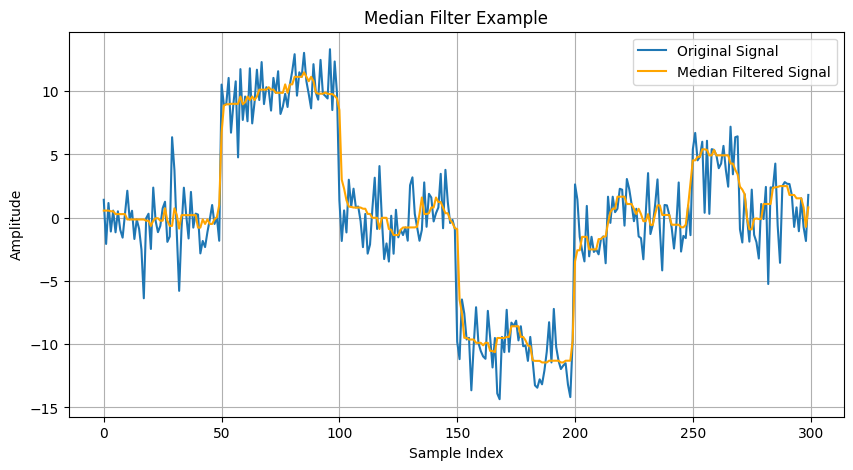

In [7]:
from scipy import ndimage
median_size = 10  # Size of the median filter

test_signal = np.zeros(300)
test_signal[50:100] = 10
test_signal[150:200] = -10
test_signal[250:270] = 5
test_signal += np.random.normal(0, 2, size=test_signal.shape)
median_filtered = ndimage.median_filter(test_signal, size=median_size)

plt.figure(figsize=(10, 5))
plt.plot(test_signal, label='Original Signal')
plt.plot(median_filtered, label='Median Filtered Signal', color='orange')
plt.title('Median Filter Example')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()  